In [39]:
from google.colab import drive

drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [40]:
import torch
torch.cuda.is_available()

True

In [0]:
import torch 
import sys
sys.path.append('/gdrive/My Drive/Proj1')
from torch import nn 
from torch.nn import functional as F
from torch import optim
from utils.loader import PairSetMNIST,Training_set,Test_set, Training_set_split,Validation_set
from torch.utils.data import Dataset, DataLoader
from models.Le_Net import  LeNet_sharing, train_Le_Net_Weight_Sharing
from models.Inception_Net import Inception_block, conv_block, Google_Net, Auxiliary_loss, train_inception
from utils.evaluate_ws import compute_metrics, validate_model, evaluate_model, grid_search
from matplotlib import pyplot as plt
import torch.cuda as cuda 
from utils.plot import boxplot

In [44]:
seeds = [2,5]
evaluate_model(LeNet_sharing,train_Le_Net_Weight_Sharing, seeds, mini_batch_size=100, optimizer = optim.SGD,
                 criterion = nn.CrossEntropyLoss(), n_epochs=40, eta=1e-1, 
                 lambda_l2 = 0, plot=False,rotate = False,translate=False,swap_channel = False, GPU=True)

Seed 0 | Test Loss: 0.0040 | Test Accuracy: 83.60%

Seed 1 | Test Loss: 0.0034 | Test Accuracy: 86.40%



(tensor([[[6.8755e-03, 6.8703e-03, 6.8687e-03, 6.8671e-03, 6.8658e-03,
           6.8643e-03, 6.8618e-03, 6.8592e-03, 6.8568e-03, 6.8536e-03,
           6.8496e-03, 6.8442e-03, 6.8374e-03, 6.8274e-03, 6.8121e-03,
           6.7922e-03, 6.7667e-03, 6.7297e-03, 6.6759e-03, 6.5966e-03,
           6.4502e-03, 6.2445e-03, 5.8889e-03, 5.4054e-03, 4.8757e-03,
           4.4648e-03, 4.0397e-03, 3.6454e-03, 3.3752e-03, 3.0398e-03,
           2.8156e-03, 2.4419e-03, 2.2162e-03, 2.0819e-03, 1.8235e-03,
           1.7143e-03, 1.6336e-03, 1.3753e-03, 1.2419e-03, 1.1705e-03],
          [5.5500e+01, 5.5500e+01, 5.5500e+01, 5.5500e+01, 5.5500e+01,
           5.5500e+01, 5.5500e+01, 5.5500e+01, 5.5500e+01, 5.5500e+01,
           5.5500e+01, 5.5500e+01, 5.5500e+01, 5.5500e+01, 5.5500e+01,
           5.5500e+01, 5.5500e+01, 5.5500e+01, 5.5500e+01, 5.6000e+01,
           6.3500e+01, 7.1625e+01, 7.6250e+01, 7.8750e+01, 8.0250e+01,
           8.2125e+01, 8.3000e+01, 8.5375e+01, 8.6375e+01, 8.8750e+01,
     

In [0]:
def evaluate_model_seed(net,training_function, seeds, mini_batch_size=100, optimizer = optim.SGD,
                 criterion = nn.CrossEntropyLoss(), n_epochs=40, eta=1e-1, 
                 lambda_l2 = 0, plot=True,, GPU=False): 
    
    """ 10 rounds of training / validation + testing metrics statistics  """
    
    train_results = torch.empty(len(seeds), 4, n_epochs)
    test_losses = []
    test_accuracies = []
    
    for n, seed in enumerate(seeds):

        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed) 

        model = net  # model with the best hyperparameters to evaluate  (200, 0.5)

        if GPU and cuda.is_available():
            device = torch.device('cuda')
        else:
            device = torch.device('cpu')


        model = model.to(device)

        train_losses, train_acc, valid_losses, valid_acc = training_function(model, train_data_split, validation_data, device, mini_batch_size, optimizer,criterion,n_epochs, eta,lambda_l2)
        train_results[n,] = torch.tensor([train_losses, train_acc, valid_losses, valid_acc])
        test_loss, test_acc = compute_metrics(model, test_data, device)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)
        
        if plot:
            
            learning_curve(train_losses, train_acc, valid_losses, valid_acc)
            
            
        
        print('Seed {:d} | Test Loss: {:.4f} | Test Accuracy: {:.2f}%\n'.format(n, test_loss, test_acc))

    return train_results, torch.tensor(test_losses), torch.tensor(test_accuracies)

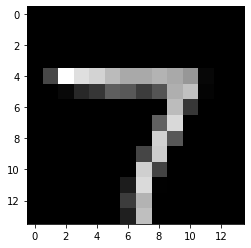

In [0]:
torch.manual_seed(4)
data = PairSetMNIST( rotate=False,translate=False,swap_channel=False)
train_data = Training_set(data)
test_data = Test_set(data)
train_data_split =Training_set_split(train_data)
validation_data= Validation_set(train_data)

plt.imshow(train_data.train_input[0,0],cmap='gray')

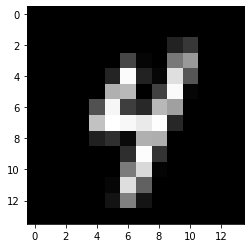

In [0]:
torch.manual_seed(5)
data = PairSetMNIST( rotate=False,translate=False,swap_channel=False)
train_data = Training_set(data)
test_data = Test_set(data)
train_data_split =Training_set_split(train_data)
validation_data= Validation_set(train_data)

plt.imshow(train_data.train_input[0,0],cmap='gray')

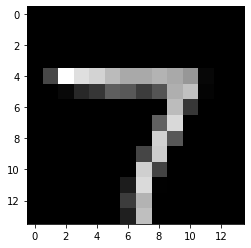

In [0]:
torch.manual_seed(4)
data = PairSetMNIST( rotate=False,translate=False,swap_channel=False)
train_data = Training_set(data)
test_data = Test_set(data)
train_data_split =Training_set_split(train_data)
validation_data= Validation_set(train_data)

plt.imshow(train_data.train_input[0,0],cmap='gray')